I would Use User input, hyper tunning, Grid search

In [ ]:
#installing dependicies
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
path= "/content/drive/MyDrive/DS Project_Housing_Dataset/Housing.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.shape


(545, 13)

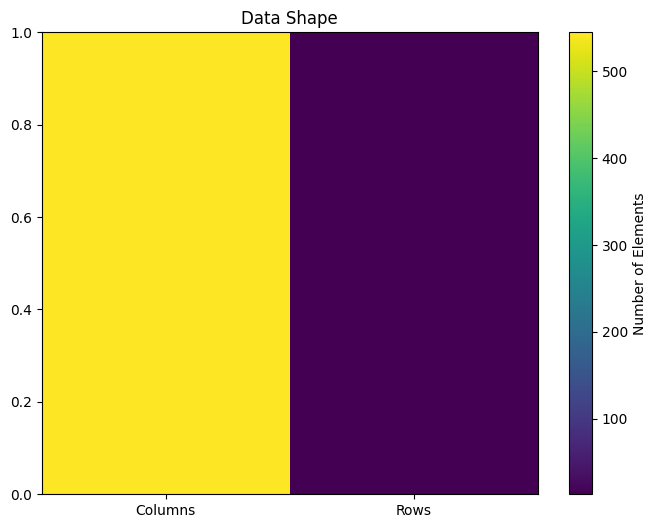

In [ ]:
data_shape = data.shape

# Creating a heatmap to visualize the data shape
plt.figure(figsize=(8, 6))
plt.imshow([data_shape], cmap='viridis', aspect='auto', extent=[0, 2, 0, 1])
plt.colorbar(label='Number of Elements')
plt.title('Data Shape')
plt.xticks([0.5, 1.5], ['Columns', 'Rows'])
plt.show()

**Bootstraping here to enhance dataset size**

In [ ]:
original_rows, num_columns = data.shape
target_rows = 2000

bootstrapped_random_indices_of_rows = np.random.choice(original_rows, size=target_rows, replace=True)

bootstrapped_data = data.iloc[bootstrapped_random_indices_of_rows]
data = bootstrapped_data

In [ ]:
bootstrapped_random_indices_of_rows

array([418, 405, 267, ..., 331, 168, 470])

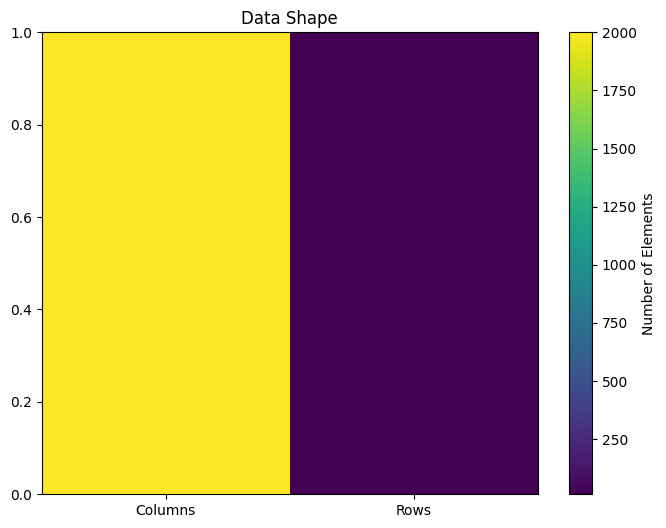

In [ ]:
# data is my DataFrame or array
data_shape = data.shape

# Creainge a heatmap to visualize the data shape
plt.figure(figsize=(8, 6))
plt.imshow([data_shape], cmap='viridis', aspect='auto', extent=[0, 2, 0, 1])
plt.colorbar(label='Number of Elements')
plt.title('Data Shape')
plt.xticks([0.5, 1.5], ['Columns', 'Rows'])
plt.show()

In [ ]:
data.describe

<bound method NDFrame.describe of        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
418  3360000  3500         4          1        2      yes        no       no   
405  3465000  3060         3          1        1      yes        no       no   
267  4403000  4920         3          1        2      yes        no       no   
492  2800000  2650         3          1        2      yes        no      yes   
328  3990000  4500         3          2        2       no        no      yes   
..       ...   ...       ...        ...      ...      ...       ...      ...   
137  5740000  4640         4          1        2      yes        no       no   
372  3640000  3180         3          1        2       no        no      yes   
331  3920000  7260         3          2        1      yes       yes      yes   
168  5250000  4260         4          1        2      yes        no      yes   
470  3010000  5076         3          1        1       no        no       no   

    h

As a few columns columns have categorical values yes, no. So, I would convert them into 1s, and 0s.

In [ ]:
data.replace('yes',1, inplace=True)
data.replace('no',0, inplace=True)
# , 'no':0
data.describe

<bound method NDFrame.describe of        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
418  3360000  3500         4          1        2         1          0   
405  3465000  3060         3          1        1         1          0   
267  4403000  4920         3          1        2         1          0   
492  2800000  2650         3          1        2         1          0   
328  3990000  4500         3          2        2         0          0   
..       ...   ...       ...        ...      ...       ...        ...   
137  5740000  4640         4          1        2         1          0   
372  3640000  3180         3          1        2         0          0   
331  3920000  7260         3          2        1         1          1   
168  5250000  4260         4          1        2         1          0   
470  3010000  5076         3          1        1         0          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
418         0      

// first three columns hot-encodning atfer second collumn.

**Still column 'furnishingstatus' has non-numerical values **

*   List item

*   List item
*   List item


*   List item



In [ ]:
data = pd.get_dummies(data, columns=['furnishingstatus'], prefix='furnishingstatus')
data.describe

<bound method NDFrame.describe of        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
418  3360000  3500         4          1        2         1          0   
405  3465000  3060         3          1        1         1          0   
267  4403000  4920         3          1        2         1          0   
492  2800000  2650         3          1        2         1          0   
328  3990000  4500         3          2        2         0          0   
..       ...   ...       ...        ...      ...       ...        ...   
137  5740000  4640         4          1        2         1          0   
372  3640000  3180         3          1        2         0          0   
331  3920000  7260         3          2        1         1          1   
168  5250000  4260         4          1        2         1          0   
470  3010000  5076         3          1        1         0          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
418         0      

In [ ]:
data.shape

(2000, 15)

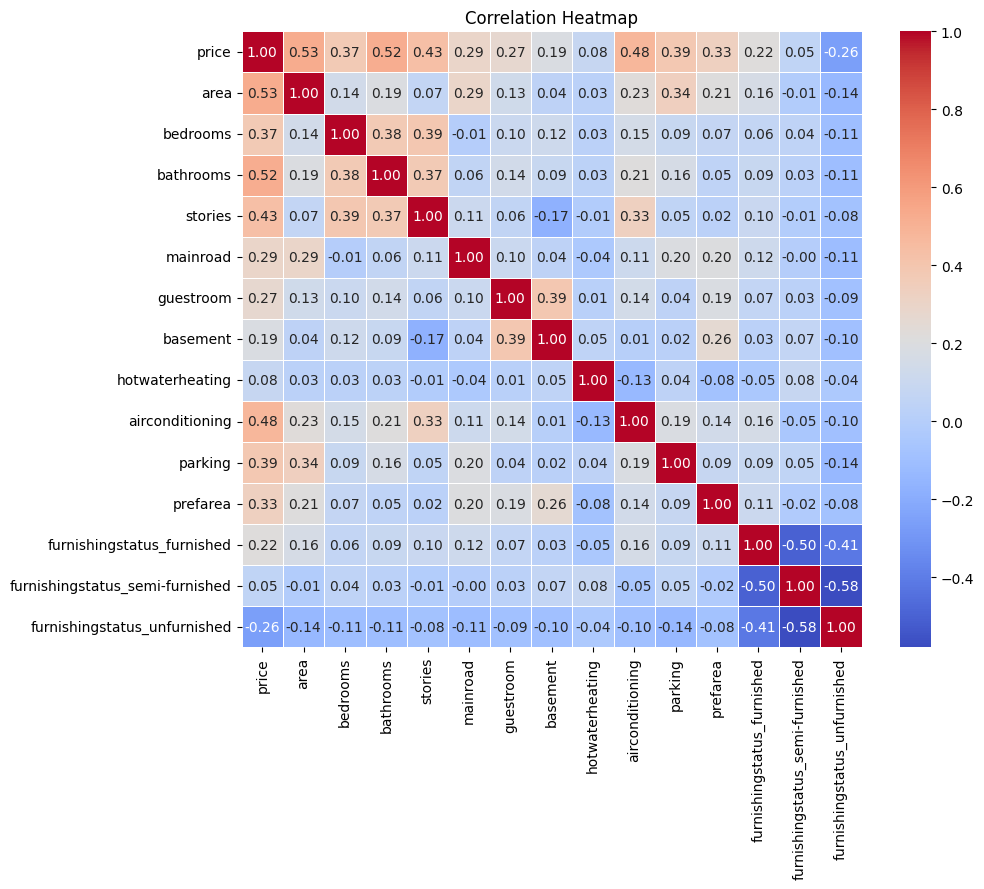

In [ ]:
correlation_matrix = data.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Checking If dataset has null or missing values**

In [ ]:
data.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [ ]:
# # Now I am dropping the rows having missing values
# data.dropna(inplace=True)
# print(data.isnull().sum())
# print(data.shape)

#Visualization
Hence my basic aim is to predict the houses' prices

In [ ]:
X = data.drop(['price'], axis=1)
X_For_Future = X.copy()
X_For_Future

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
418,3500,4,1,2,1,0,0,0,1,2,0,0,0,1
405,3060,3,1,1,1,0,0,0,0,0,0,0,0,1
267,4920,3,1,2,1,0,0,0,0,1,0,0,1,0
492,2650,3,1,2,1,0,1,0,0,1,0,0,0,1
328,4500,3,2,2,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,4640,4,1,2,1,0,0,0,0,1,0,0,1,0
372,3180,3,1,2,0,0,1,0,0,0,0,0,1,0
331,7260,3,2,1,1,1,1,0,0,3,0,1,0,0
168,4260,4,1,2,1,0,1,0,1,0,0,1,0,0


In [ ]:
X_For_Future

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
418,3500,4,1,2,1,0,0,0,1,2,0,0,0,1
405,3060,3,1,1,1,0,0,0,0,0,0,0,0,1
267,4920,3,1,2,1,0,0,0,0,1,0,0,1,0
492,2650,3,1,2,1,0,1,0,0,1,0,0,0,1
328,4500,3,2,2,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,4640,4,1,2,1,0,0,0,0,1,0,0,1,0
372,3180,3,1,2,0,0,1,0,0,0,0,0,1,0
331,7260,3,2,1,1,1,1,0,0,3,0,1,0,0
168,4260,4,1,2,1,0,1,0,1,0,0,1,0,0


**Feature Engineering: I have applied scalability**

In [ ]:
from sklearn.preprocessing import StandardScaler

x_columns = X.select_dtypes(include=['uint8', 'int64']).columns

scaler = StandardScaler()

X[x_columns] = scaler.fit_transform(X[x_columns])

print(X.head())



         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
418 -0.789831  1.385725  -0.565920  0.208630  0.409319  -0.501562 -0.765534   
405 -0.989705  0.036431  -0.565920 -0.934549  0.409319  -0.501562 -0.765534   
267 -0.144784  0.036431  -0.565920  0.208630  0.409319  -0.501562 -0.765534   
492 -1.175951  0.036431  -0.565920  0.208630  0.409319  -0.501562  1.306277   
328 -0.335573  0.036431   1.388899  0.208630 -2.443080  -0.501562  1.306277   

     hotwaterheating  airconditioning   parking  prefarea  \
418        -0.215807         1.495408  1.536431 -0.548079   
405        -0.215807        -0.668714 -0.795027 -0.548079   
267        -0.215807        -0.668714  0.370702 -0.548079   
492        -0.215807        -0.668714  0.370702 -0.548079   
328        -0.215807         1.495408 -0.795027 -0.548079   

     furnishingstatus_furnished  furnishingstatus_semi-furnished  \
418                   -0.598141                        -0.837066   
405                   

In [ ]:
X_For_Future

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
418,3500,4,1,2,1,0,0,0,1,2,0,0,0,1
405,3060,3,1,1,1,0,0,0,0,0,0,0,0,1
267,4920,3,1,2,1,0,0,0,0,1,0,0,1,0
492,2650,3,1,2,1,0,1,0,0,1,0,0,0,1
328,4500,3,2,2,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,4640,4,1,2,1,0,0,0,0,1,0,0,1,0
372,3180,3,1,2,0,0,1,0,0,0,0,0,1,0
331,7260,3,2,1,1,1,1,0,0,3,0,1,0,0
168,4260,4,1,2,1,0,1,0,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
Y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regres = LinearRegression()
regres.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Now prediction
prediction = regres.predict(x_test)
prediction

array([4206206.18600079, 6419263.8814723 , 7548676.14472768,
       4787741.89879983, 3461452.41525212, 2895955.46828363,
       5601205.94104827, 5201601.51067512, 2946833.94073249,
       4787741.89879983, 5724962.38669519, 3939050.74966937,
       7381624.73843438, 9153702.59971664, 4137866.85053373,
       4151904.77112596, 5290086.84517041, 8432367.56966141,
       9954763.01091396, 2986640.21877678, 3742276.67891837,
       3615255.74309104, 7298932.50416444, 3192195.50543085,
       4206206.18600079, 3768016.61544421, 4093942.24856717,
       5694805.14293693, 4482751.93340871, 6668425.30415449,
       4511378.38392704, 4169844.0194681 , 3244219.71658856,
       4773345.35075298, 3012687.68711775, 4081469.33904375,
       3805943.18488465, 4952601.78183648, 5967623.99129172,
       5166730.15974792, 6278072.93194703, 3304474.73618203,
       3208035.79289603, 3560150.8696826 , 6793927.84414069,
       3841434.50844386, 3845916.37413066, 3678677.70733222,
       6604134.77564911,

In [ ]:
regres.score(x_test, y_test)

0.6353307159442945

**Now I apply Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_instance = RandomForestRegressor()
forest_instance.fit(x_train, y_train)




RandomForestRegressor()

In [ ]:
# Calculating R^2 on the test data
RF_score = forest_instance.score(x_test, y_test)
print(RF_score)

0.9255524456381536


In [ ]:
y_predict = forest_instance.predict(x_test)
y_predict
both = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
# print(both)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Creating a DataFrame with actual and predicted values
both = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

# Print the DataFrame
print(both)

pd.reset_option('display.float_format')




      Actual  Predicted
219  4795000 4797100.00
38   7962500 7962500.00
59   7210000 7466614.40
146  5600000 5496470.00
520  2450000 2671690.00
..       ...        ...
200  4900000 4711525.00
124  5950000 6009500.00
370  3640000 3635100.00
143  5600000 5595100.00
285  4235000 4245500.00

[400 rows x 2 columns]


In [ ]:
# First five vlaues of y_test and y_predicted
print(y_test[:5])  # Print the first five values of y_test

print(y_predict[:5])  # Print the first five predicted values


219    4795000
38     7962500
59     7210000
146    5600000
520    2450000
Name: price, dtype: int64
[4797100.  7962500.  7466614.4 5496470.  2671690. ]


In [ ]:

stories_greater_than_1 = data.loc[data['stories'] > 1, 'stories']

print(stories_greater_than_1)


418    2
267    2
492    2
328    2
198    2
      ..
60     2
245    2
137    2
372    2
168    2
Name: stories, Length: 1183, dtype: int64


Now I would get input from user and model would predict the output

From here deliberately commented

In [ ]:
significant_features_Array = ['area', 'bathrooms', 'stories', 'airconditioning', 'prefarea']

In [ ]:
# price	area	bedrooms	bathrooms	stories	mainroad	guestroom	basement	hotwaterheating	airconditioning	parking	prefarea	furnishingstatus
# 0	13300000	7420	4	2	3	yes	no	no	no	yes	2	yes	furnished
# 1	12250000	8960	4	4	4	yes	no	no	no	yes	3	no	furnished
# 2	12250000	9960	3	2	2	yes	no	yes	no	no	2	yes	semi-furnished

In [ ]:

columns_shown = {'area': 'in sq feet', 'bathrooms': 'number of bathrooms', 'stories':'number', 'airconditioning': '1 or 0', 'prefarea':'1 or 0'}
print(columns_shown)
values = {}
print("Enter the values of Features 'Area: '")
for indices in significant_features_Array:
    values[indices] = float(input(f"Enter the value for {indices}: ")) # #price:5145000 area: 3410, bdr 3, bthr 1, mnr no, gstr no,  airconditioning   yes, prf no

{'area': 'in sq feet', 'bathrooms': 'number of bathrooms', 'stories': 'number', 'airconditioning': '1 or 0', 'prefarea': '1 or 0'}
Enter the values of Features 'Area: '
Enter the value for area: 7420
Enter the value for bathrooms: 2
Enter the value for stories: 3
Enter the value for airconditioning: 1
Enter the value for prefarea: 1


Finding the outlier to choose the best metric mean, mode, median

In [ ]:
#///////////////////////////////////////////////////////////////////
# def has_outliers(column):
#     # Calculate the IQR (Interquartile Range)
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Check if any value in the column is an outlier
#     has_outliers = any((column < lower_bound) | (column > upper_bound))

#     return has_outliers

# # Example usage for the 'stories' column
# boolean = has_outliers(data['stories'])
# print(f"The 'stories' column has outliers: {boolean}")
# mode_airconditioning = x_test['airconditioning'].mode()
# print(mode_airconditioning)
#/////////////////////////////////////////////////////////////////////
# Columns having outlier
# The 'stories' column has outliers: True
# The 'bathrooms' column has outliers: True
# The 'guestroom' column has outliers: True
# The 'basement' column has outliers: False
# 'hotwaterheating' column has outliers: True
# The 'parking' column has outliers: True
# The 'furnishingstatus_furnished' column has outliers: False
# The 'furnishingstatus_semi-furnished' column has outliers: False
# The 'furnishingstatus_unfurnished' column has outliers: False
#significant_features_Array = ['area', 'bathrooms', 'stories', 'airconditioning', 'prefarea']

In [ ]:
area_value = values['area']
no_bedrooms = values['bathrooms']
bathrooms = x_test['bedrooms'].mode()
stories = x_test['mainroad'].mode()

mainroad = values['stories']
guestroom = x_test['guestroom'].mode()
basement = x_test['basement'].mode()
hotwaterheating = x_test['hotwaterheating'].mode()

airconditioning = values['airconditioning']

parking = data['parking'].mode();

prefarea = values['prefarea'];
furnishingstatus_furnished = x_test['furnishingstatus_furnished'].mode()

furnishingstatus_semi_furnished = x_test['furnishingstatus_semi-furnished'].mode()
furnishingstatus_unfurnished = x_test['furnishingstatus_unfurnished'].mode()
# area	bedrooms	bathrooms	stories	mainroad	guestroom	basement	hotwaterheating	airconditioning	parking
User_dataframe = {
    'area': area_value,
    'bedrooms': no_bedrooms,
    'bathrooms': bathrooms,
    'stories': stories,
    'mainroad': mainroad,
    'guestroom': guestroom,
    'basement': basement,
    'hotwaterheating': hotwaterheating,
    'airconditioning': airconditioning,
    'parking': parking,
    'prefarea': prefarea,
    'furnishingstatus_furnished': furnishingstatus_furnished,
    'furnishingstatus_semi-furnished': furnishingstatus_semi_furnished,
    'furnishingstatus_unfurnished': furnishingstatus_unfurnished
}

User_dataframe = pd.DataFrame(User_dataframe)
User_dataframe

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420.0,2.0,0.036431,0.409319,3.0,-0.501562,-0.765534,-0.215807,1.0,0,1.0,-0.598141,-0.837066,-0.693098


In [ ]:

# Print the standardized values before inversion
X_For_Future

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
418,3500,4,1,2,1,0,0,0,1,2,0,0,0,1
405,3060,3,1,1,1,0,0,0,0,0,0,0,0,1
267,4920,3,1,2,1,0,0,0,0,1,0,0,1,0
492,2650,3,1,2,1,0,1,0,0,1,0,0,0,1
328,4500,3,2,2,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,4640,4,1,2,1,0,0,0,0,1,0,0,1,0
372,3180,3,1,2,0,0,1,0,0,0,0,0,1,0
331,7260,3,2,1,1,1,1,0,0,3,0,1,0,0
168,4260,4,1,2,1,0,1,0,1,0,0,1,0,0


In [ ]:
# print(X_For_Future)

In [ ]:
X_For_Future = pd.concat([X_For_Future, User_dataframe], ignore_index=True)

Making user_dataframe scaled

In [ ]:
# X_For_Future

In [ ]:

from sklearn.preprocessing import StandardScaler

numeric_columns = X_For_Future.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X_For_Future[numeric_columns] = scaler.fit_transform(X_For_Future[numeric_columns])
X_For_Future

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,-0.790330,1.386131,-0.563992,0.209352,0.402622,-0.500427,-0.763496,-0.215144,1.494200,1.536970,-0.548671,-0.596743,-0.834665,1.442543
1,-0.990205,0.037080,-0.563992,-0.933374,0.402622,-0.500427,-0.763496,-0.215144,-0.669255,-0.794703,-0.548671,-0.596743,-0.834665,1.442543
2,-0.145280,0.037080,-0.563992,0.209352,0.402622,-0.500427,-0.763496,-0.215144,-0.669255,0.371133,-0.548671,-0.596743,1.194295,-0.691369
3,-1.176451,0.037080,-0.563992,0.209352,0.402622,-0.500427,1.305976,-0.215144,-0.669255,0.371133,-0.548671,-0.596743,-0.834665,1.442543
4,-0.336069,0.037080,1.388391,0.209352,-2.424208,-0.500427,1.305976,-0.215144,1.494200,-0.794703,-0.548671,-0.596743,1.194295,-0.691369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-0.935693,0.037080,-0.563992,0.209352,-2.424208,-0.500427,1.305976,-0.215144,-0.669255,-0.794703,-0.548671,-0.596743,1.194295,-0.691369
1997,0.917689,0.037080,1.388391,-0.933374,0.402622,1.993616,1.305976,-0.215144,-0.669255,2.702806,-0.548671,1.671644,-0.834665,-0.691369
1998,-0.445092,1.386131,-0.563992,0.209352,0.402622,-0.500427,1.305976,-0.215144,1.494200,-0.794703,-0.548671,1.671644,-0.834665,-0.691369
1999,-0.074415,0.037080,-0.563992,-0.933374,-2.424208,-0.500427,-0.763496,-0.215144,-0.669255,-0.794703,-0.548671,-0.596743,-0.834665,1.442543


In [ ]:
# Getting the last row of the standardized DataFrame
last_row = X_For_Future.iloc[-1:]

# Creating a new DataFrame with the last row
user_dataframe = pd.DataFrame(last_row, columns=last_row.columns)

print(user_dataframe)

          area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
2000  0.990371  -1.31197  -2.445248 -1.608359  6.056281  -1.751344 -2.347748   

      hotwaterheating  airconditioning   parking  prefarea  \
2000        -1.261561           1.4942 -0.794703  1.822584   

      furnishingstatus_furnished  furnishingstatus_semi-furnished  \
2000                   -1.953559                         -2.53304   

      furnishingstatus_unfurnished  
2000                     -2.170379  


Here is the prediction of User data

In [ ]:
# Make predictions using the trained model
predicted_value = forest_instance.predict(user_dataframe)

# Print or use the predicted value
print("Predicted Value:", predicted_value[0]) # #price:5145000 area: 3410, bdr 3, bthr 1, mnr no, gstr no,  airconditioning   yes, prf no

Predicted Value: 4990090.0


In [ ]:
print(User_dataframe[numeric_columns].isnull().sum())


area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


Making Predictions on User's Data

In [ ]:
User_dataframe

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420.0,2.0,0.036431,0.409319,3.0,-0.501562,-0.765534,-0.215807,1.0,0,1.0,-0.598141,-0.837066,-0.693098


In [ ]:
price_for_user = forest_instance.predict(User_dataframe)
print(price_for_user)

[5933900.]


From here all are delebertaely commented

In [ ]:
# mode_bathrooms = data['bathrooms'].mode()[0]

# mode_furnishing_status = data['furnishingstatus_furnished'].mode()[0]
# print(mode_furnishing_status)

This is to implement in last

In [ ]:
# from sklearn.metrics import mean_squared_error

# # Assuming you have the true outcomes for the test data (y_test)
# # Calculate Mean Squared Error (MSE) as an example metric
# mse = mean_squared_error(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')

#Testing the Model Again

In [ ]:
# x_test =

In [ ]:
X_For_Future

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,-0.790330,1.386131,-0.563992,0.209352,0.402622,-0.500427,-0.763496,-0.215144,1.494200,1.536970,-0.548671,-0.596743,-0.834665,1.442543
1,-0.990205,0.037080,-0.563992,-0.933374,0.402622,-0.500427,-0.763496,-0.215144,-0.669255,-0.794703,-0.548671,-0.596743,-0.834665,1.442543
2,-0.145280,0.037080,-0.563992,0.209352,0.402622,-0.500427,-0.763496,-0.215144,-0.669255,0.371133,-0.548671,-0.596743,1.194295,-0.691369
3,-1.176451,0.037080,-0.563992,0.209352,0.402622,-0.500427,1.305976,-0.215144,-0.669255,0.371133,-0.548671,-0.596743,-0.834665,1.442543
4,-0.336069,0.037080,1.388391,0.209352,-2.424208,-0.500427,1.305976,-0.215144,1.494200,-0.794703,-0.548671,-0.596743,1.194295,-0.691369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-0.935693,0.037080,-0.563992,0.209352,-2.424208,-0.500427,1.305976,-0.215144,-0.669255,-0.794703,-0.548671,-0.596743,1.194295,-0.691369
1997,0.917689,0.037080,1.388391,-0.933374,0.402622,1.993616,1.305976,-0.215144,-0.669255,2.702806,-0.548671,1.671644,-0.834665,-0.691369
1998,-0.445092,1.386131,-0.563992,0.209352,0.402622,-0.500427,1.305976,-0.215144,1.494200,-0.794703,-0.548671,1.671644,-0.834665,-0.691369
1999,-0.074415,0.037080,-0.563992,-0.933374,-2.424208,-0.500427,-0.763496,-0.215144,-0.669255,-0.794703,-0.548671,-0.596743,-0.834665,1.442543
